# ----- Altimeter data  analysis ----- 
##  AVISO (Archiving, Validation and Interpretation of Satellite Oceanographic data)

In [2]:
%load_ext ferretmagic

## ! ----- Reading AVISO sea level data and Tide Gaugedata  ----- 

In [3]:
%%ferret
cancel data/all
use/order=XYT Data/AVISO_monthly_2x2deg_Indo_Pacifi_1993_2019.nc
use Data/AVISO_NIO_1x1deg.nc
use Data/TG/Gan_d109.nc
use Data/TG/Padang_d107.nc
sh d

           *** NOTE: Dataset has FeatureType attribute: Timeseries
           *** NOTE: But is not initialized as a DSG File: Row Size variable w/ sample_dimension attribute not found.
           *** NOTE: Initializing the file as a non-DSG dataset
           *** NOTE: Dataset has FeatureType attribute: Timeseries
           *** NOTE: But is not initialized as a DSG File: Row Size variable w/ sample_dimension attribute not found.
           *** NOTE: Initializing the file as a non-DSG dataset


currently SET data sets:
 1> Data/AVISO_monthly_2x2deg_Indo_Pacifi_1993_2019.nc
 name title I J K L
 SLA SSH[G=GRD1] 1:136 1:70 ... 1:321
 
 2> Data/AVISO_NIO_1x1deg.nc
 name title I J K L
 SSH SLA[G=GRD] 1:61 1:33 ... 1:1376
 
 3> Data/TG/Gan_d109.nc
 name title I J K L M N
 SEA_LEVEL
 relative sea level ... ... ... 1:12172 1:1 ...
 LAT ... ... ... ... 1:1 ...
 LON ... ... ... ... 1:1 ...
 STATION_NAME
 station name ... ... ... ... 1:1 ...
 STATION_COUNTRY
 station country (ISO 3166-1) ... ... ... ... 1:1 ...
 STATION_COUNTRY_CODE
 station country code (ISO 3166- ... ... ... ... 1:1 ...
 UHSLC_ID unique station ID number used b ... ... ... ... 1:1 ...
 GLOSS_ID unique station ID number used b ... ... ... ... 1:1 ...
 SSC_ID unique station ID code in the S ... ... ... ... 1:1 ...
 LAST_RQ_DATE
 date of last Research Quality s ... ... ... ... 1:1 ...
 
 4> Data/TG/Padang_d107.nc (default)
 name title I J K L M N
 SEA_LEVEL
 relative sea level ... ... ... 1:5319 1:1 ...
 LAT ... ... ... ... 1:1 ...
 LON ... ... ... ... 1:1 ...
 STATION_NAME
 station name ... ... ... ... 1:1 ...
 STATION_COUNTRY
 station country (ISO 3166-1) ... ... ... ... 1:1 ...
 STATION_COUNTRY_CODE
 station country code (ISO 3166- ... ... ... ... 1:1 ...
 UHSLC_ID unique station ID number used b ... ... ... ... 1:1 ...
 GLOSS_ID unique station ID number used b ... ... ... ... 1:1 ...
 SSC_ID unique station ID code in the S ... ... ... ... 1:1 ...
 LAST_RQ_DATE
 date of last Research Quality s ... ... ... ... 1:1 ...

## ! -----  Plot the AVISO data  ----- !

! Enter_GO fland 5
! Exit_GO
! Enter_GO land 7
! Exit_GO


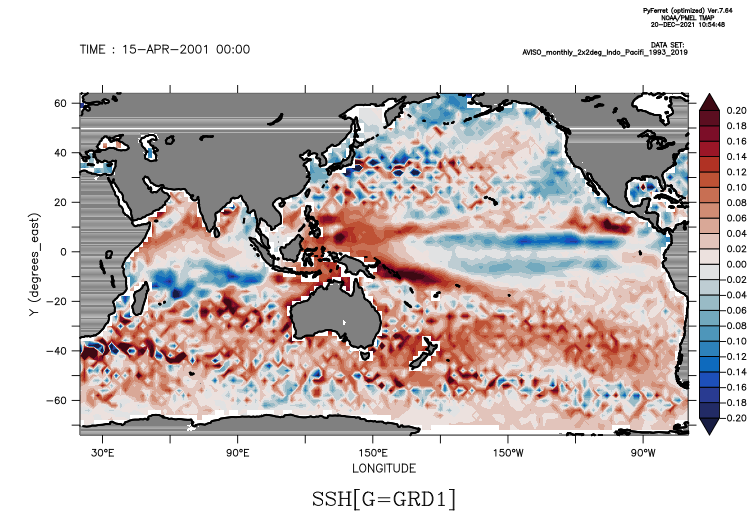

In [15]:
%%ferret
palette cmocean_balance
set win/asp=.7
fill/l=100/lev=(-inf)(-.2,.2,0.02)(inf) sla[d=1]
go fland 5 ; go land 7

## ! ----  Compare how satellite data is compared with Tige gauge  ---- !

! Enter_GO fland 5
! Exit_GO
! Enter_GO land 7
! Exit_GO


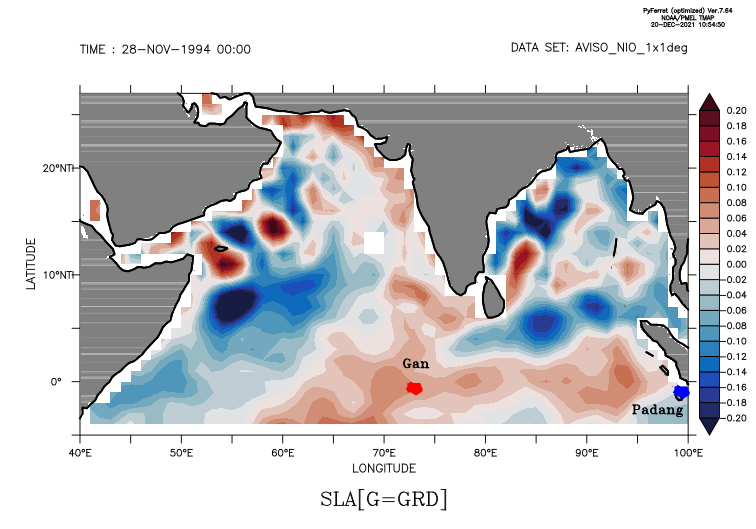

In [16]:
%%ferret
set win/asp=.7
fill/l=100/lev=(-inf)(-.2,.2,0.02)(inf) ssh[d=2]
go fland 5 ; go land 7
plot/vs/over/nolab/thick=10/sym=88/color=red   73.15, -0.6870
plot/vs/over/nolab/thick=10/sym=88/color=blue 99.5, -1.000
label 73.15, `-0.6870+2`,0,0,0.13 @TRGan
label 97,`-1.000-2`,0,0,0.13   @TRPadang

## ! ----- Compare Gan Tide gauge with AVISO sea level data -------


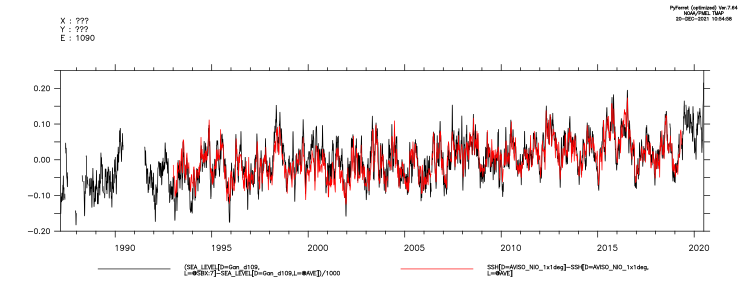

In [17]:
%%ferret
set win/asp=.4
pl/x=73.15/y=-0.687 (sea_level[d=3,l=@sbx:7]-sea_level[d=3,l=@ave])/1000,ssh[d=2]-ssh[d=2,l=@ave] 

## zoom region


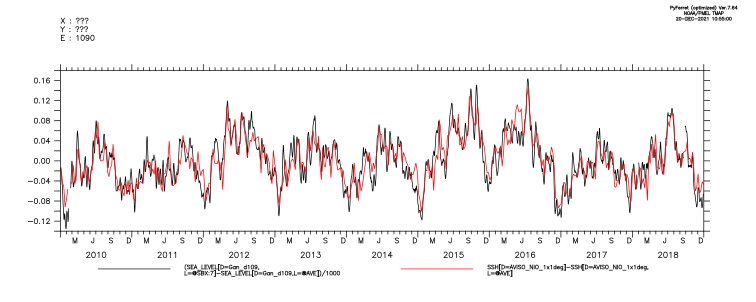

In [18]:
%%ferret
set win/asp=.4
pl/x=73.15/y=-0.687/t=01-jan-2010:31-dec-2018 (sea_level[d=3,l=@sbx:7]-sea_level[d=3,l=@ave])/1000,ssh[d=2]-ssh[d=2,l=@ave]

## ! ----- Compare Gan Tide gauge with AVISO sea level data -------


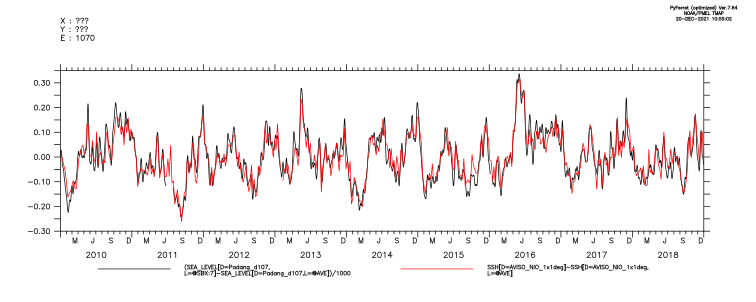

In [19]:
%%ferret
set win/asp=.4
pl/x=100/y=-1.000/t=01-jan-2010:31-dec-2018 (sea_level[d=4,l=@sbx:7]-sea_level[d=4,l=@ave])/1000,ssh[d=2]-ssh[d=2,l=@ave]

## Time evolution of sea level from two locations

! Enter_GO fland 5
! Exit_GO
! Enter_GO land 7
! Exit_GO


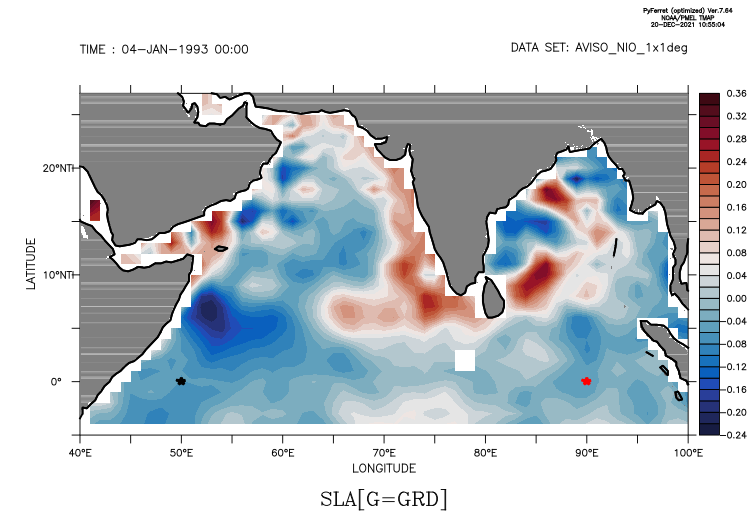

In [20]:
%%ferret
set win/as=.7
fill/l=1 ssh[d=2] ; go fland 5 ;  go land 7
plot/thick=3/over/vs/sym=88/color=black/nolab 50,0
plot/thick=3/over/vs/sym=88/color=red/nolab 90,0


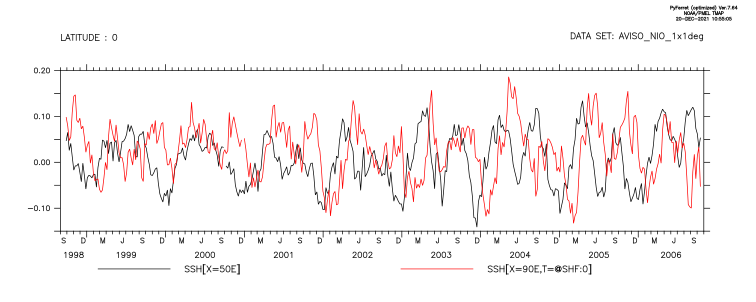

In [21]:
%%ferret
set win/asp=.4
pl/y=0/l=300:720 ssh[d=2,x=50],ssh[d=2,x=90,l=@shf:0]

## How to identify sea level signal propagation using AVISO 

I / *: 0.2477 "m/s"


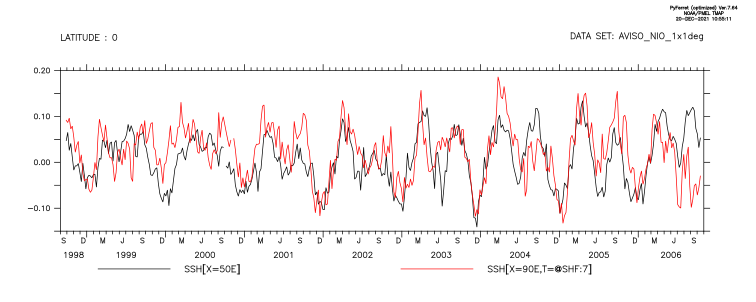

In [23]:
%%ferret
set win/asp=.4
pl/y=0/l=300:720 ssh[d=2,x=50],ssh[d=2,x=90,l=@shf:7]
list/nohead (90-50)*110*1000/(7*30*84600),"m/s"

## Time evolution of sea level from two latitudinal section

! Enter_GO fland 5
! Exit_GO
! Enter_GO land 7
! Exit_GO


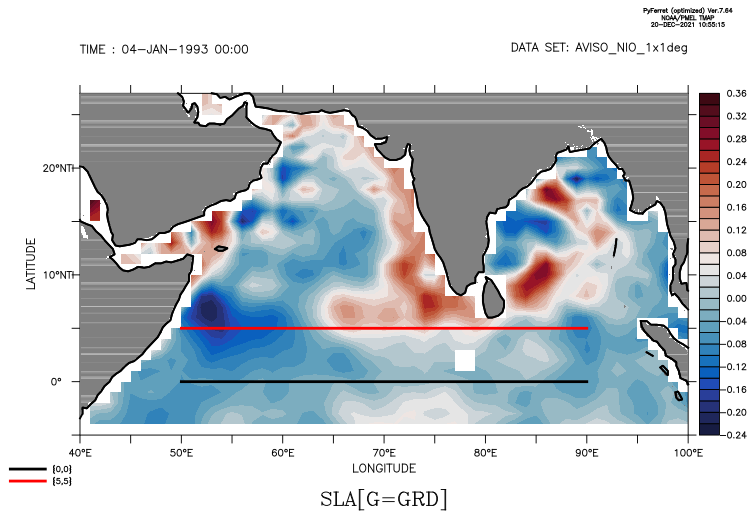

In [24]:
%%ferret
set win/as=.7
fill/l=1 ssh[d=2] ; go fland 5 ;  go land 7
plot/line/thick=3/over/vs/color=black {50,90},{0,0}
plot/line/thick=3/over/vs/color=red {50,90},{5,5}

## Hovemullar analysis

I / *: 0.2955 "m/s"


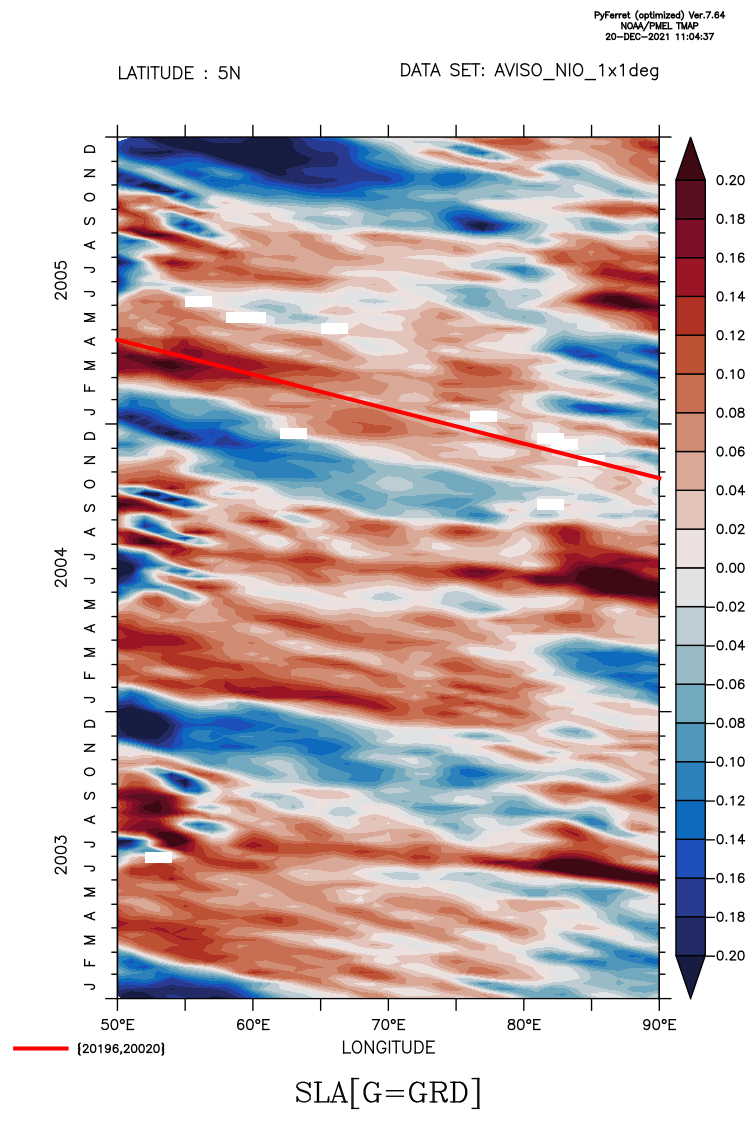

In [30]:
%%ferret
set win/as=1.5

fill/y=5/t=01-jan-2003:30-dec-2005/x=50:90/lev=(-inf)(-.2,.2,0.02)(inf) ssh[d=2]
plot/line/thick=3/over/vs/color=red {50,90},{20196,20020}
list/nohead (90-50)*110*1000/((20196-20020)*84600),"m/s"


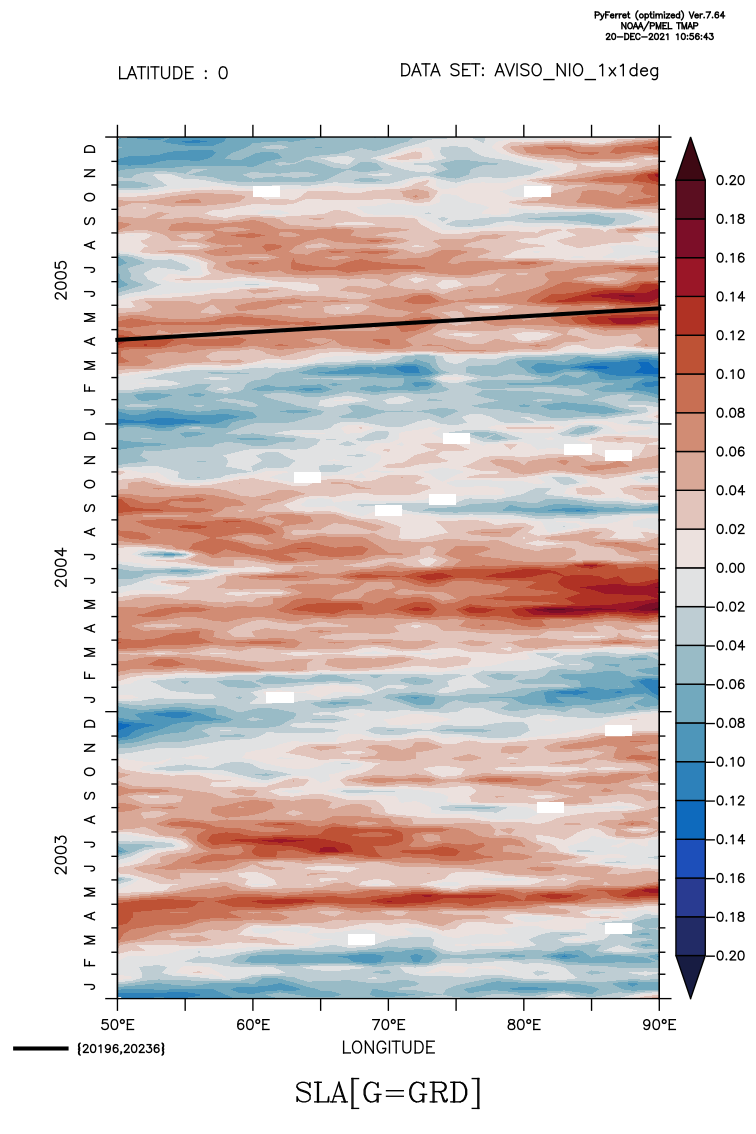

In [26]:
%%ferret
set win/as=1.5
fill/y=0/t=01-jan-2003:30-dec-2005/x=50:90/lev=(-inf)(-.2,.2,0.02)(inf) ssh[d=2]
plot/line/thick=3/over/vs/color=black {50,90},{20196,20236}